<a href="https://colab.research.google.com/github/FabianaDutra/DataChallengeALURA/blob/main/ALURA_DATA_CHALLENGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>ALURA Challenge - Data Science</b>
CHURN DE CLIENTES

## Imports  <i>(Importando bibliotecas)</i>

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Sets

In [267]:
sns.set( rc = {'figure.figsize' : ( 10,5), 'axes.labelsize' : 10 }) 

## <b> SEMANA 01 - Preparando os dados</i></b>

### <i>  Dicionário de Dados </i>

Data Dictionary <i>(Dicionário de Dados)</i>

   - customerID: número de identificação único de cada cliente
    - Churn: se o cliente deixou ou não a empresa
    - gender: gênero (masculino e feminino)
    - SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
    - Partner: se o cliente possui ou não um parceiro ou parceira
    - Dependents: se o cliente possui ou não dependentes tenure: meses de contrato do cliente
     -tenure: meses de contrato do cliente
    - PhoneService: assinatura de serviço telefônico
    - MultipleLines: assisnatura de mais de uma linha de telefone
    - InternetService: assinatura de um provedor internet
    - OnlineSecurity: assinatura adicional de segurança online
    - OnlineBackup: assinatura adicional de backup online
    - DeviceProtection: assinatura adicional de proteção no dispositivo
    - TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
    - StreamingTV: assinatura de TV a cabo
    - StreamingMovies: assinatura de streaming de filmes
    - Contract: tipo de contrato
    - PaperlessBilling: se o cliente prefere receber online a fatura
    - PaymentMethod: forma de pagamento
    - Charges.Monthly: total de todos os serviços do cliente por mês
    - Charges.Total: total gasto pelo cliente

In [268]:
# Sexo : Masculino = 0 e Feminino = 1
dic_Sexo = {"Male":0, "Female":1}

In [269]:
# Senioridade: se o cliente tem MENOS de 65 anos = 0 e MAIS de 65 anos = 1
dic_senior = {"MENOS_65": 0, "MAIS_65": 1}

### <i>Lendo dados JSON  do Github</i>

In [270]:
df_json = pd.read_json(
                  path_or_buf = "https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json"                
                  )
df_json.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### <i>  Organizando o DataFrame</i>

In [271]:
df_customer_5 = pd.json_normalize(data = df_json.customer)
df_customer_5.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [272]:
df_phone_2 = pd.json_normalize(data = df_json.phone)
df_phone_2.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [273]:
df_internet_7 = pd.json_normalize(data = df_json.internet)
df_internet_7.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [274]:
df_account_5 = pd.json_normalize(data = df_json.account)
df_account_5.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [275]:
df = pd.concat([df_json["customerID"], df_json["Churn"], df_customer_5,df_phone_2,df_internet_7,df_account_5],axis=1)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [276]:
print("DataFrame com:", df.shape[0], "linhas e :", df.shape[1],"colunas")

DataFrame com: 7267 linhas e : 21 colunas


### <i> Avaliando os Dados</i>

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [278]:
df.isnull().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

#### custumerID

In [279]:
df["customerID"].unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

Número de identificação único de cada cliente
Dtype: object(string)

#### Churn

In [280]:
df["Churn"].unique() 

array(['No', 'Yes', ''], dtype=object)

In [281]:
df["Churn"].value_counts()

No     5174
Yes    1869
        224
Name: Churn, dtype: int64

In [282]:
Perc_dados_inc_churn = (len(df[(df["Churn"] == "")]) / len(df))*100
Perc_churn_positivos = (len(df[(df["Churn"] == "Yes")]) / len(df))*100
Perc_churn_negativo = (len(df[(df["Churn"] == "No")]) / len(df))*100
print ("[CHURN] Percentual de dados Inconsistentes = {:.2f}%".format(Perc_dados_inc_churn))
print ("[CHURN] Percentual de CHURN Positivo = {:.2f}%".format(Perc_churn_positivos))
print ("[CHURN] Percentual de CHURN Negativo = {:.2f}%".format(Perc_churn_negativo))

[CHURN] Percentual de dados Inconsistentes = 3.08%
[CHURN] Percentual de CHURN Positivo = 25.72%
[CHURN] Percentual de CHURN Negativo = 71.20%


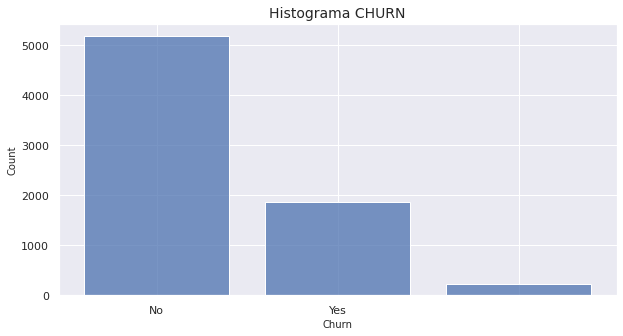

In [283]:
ax = sns.histplot(df["Churn"] ,shrink=.8)
ax.axes.set_title('Histograma CHURN', fontsize = 14)
plt.show()

OBS:  Indica se o cliente deixou ou não a empresa. Registro com valores: "Yes" , "No", e também alguns valores vazios. Dtype: Object(

#### gender

In [284]:
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [285]:
Perc_feminino = (len(df[(df["gender"] == "Female")]) / len(df))*100
Perc_masculino = (len(df[(df["gender"] == "Male")]) / len(df))*100
print ("[GENERO] Percentual Feminino = {:.2f}%".format(Perc_feminino))
print ("[GENERO] Percentual Masculino = {:.2f}%".format(Perc_masculino))

[GENERO] Percentual Feminino = 49.43%
[GENERO] Percentual Masculino = 50.57%


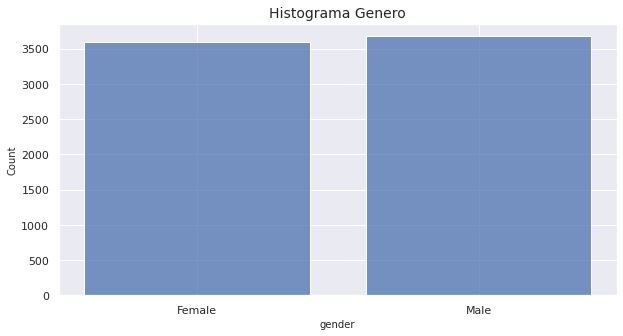

In [286]:
ax = sns.histplot(df["gender"] ,shrink=.8)
ax.axes.set_title('Histograma Genero', fontsize = 14)
plt.show()

OBS: Indica o gênero do cliente (masculino e feminino). Dtype: Object. Dados distribuidos igualmente entre os dois gêneros

####SeniorCitizen

In [287]:
df["SeniorCitizen"].unique()

array([0, 1])

In [288]:
Perc_menor_65 = (len(df[(df["SeniorCitizen"] == 0)]) / len(df))*100
Perc_maior_65 = (len(df[(df["SeniorCitizen"] == 1)]) / len(df))*100
print ("[SENIORIDADE] Percentual Menor 65 anos = {:.2f}%".format(Perc_menor_65))
print ("[SENIORIDADE] Percentual Maior 65 anos = {:.2f}%".format(Perc_maior_65))

[SENIORIDADE] Percentual Menor 65 anos = 83.73%
[SENIORIDADE] Percentual Maior 65 anos = 16.27%


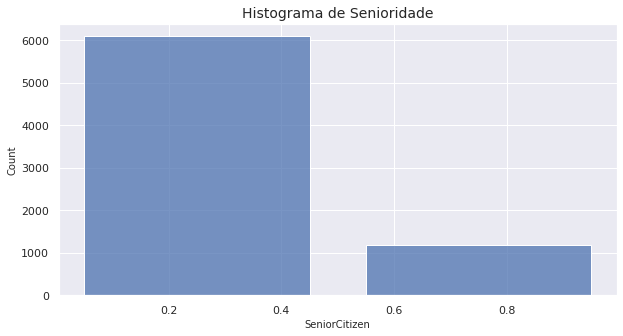

In [289]:
ax = sns.histplot(df["SeniorCitizen"] , shrink=.8,  bins = 2)
ax.axes.set_title('Histograma de Senioridade', fontsize = 14)
plt.show()

OBS: informação sobre um cliente ter ou não idade igual ou maior que 65 anos.
Diferente de outros items, aqui os valores não estão marcados como Yes/No, mas como 0 e 1, já preparados para processamento. Dtype:Int. Distribuição de dados com mais clientes na faixa menor que 65 anos

#### Partner

In [290]:
df["Partner"].unique()

array(['Yes', 'No'], dtype=object)

In [291]:
Perc_parceiro_nao = (len(df[(df["Partner"] == "No")]) / len(df))*100
Perc_parceiro_sim = (len(df[(df["Partner"] == "Yes")]) / len(df))*100
print ("[COMPANHEIRO] Percentual possuem parceiro = {:.2f}%".format(Perc_parceiro_sim))
print ("[COMPANHEIRO] Percentual não possuem parceiro = {:.2f}%".format(Perc_parceiro_nao))

[COMPANHEIRO] Percentual possuem parceiro = 48.41%
[COMPANHEIRO] Percentual não possuem parceiro = 51.59%


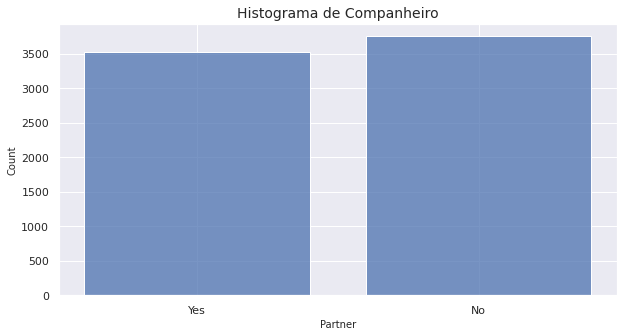

In [292]:
ax = sns.histplot(df["Partner"] , shrink=.8,  bins = 2)
ax.axes.set_title('Histograma de Companheiro', fontsize = 14)
plt.show()

OBS: Indica se o cliente possui ou não um parceiro. Dtype: object.
Dados distribuidos de maneira igualitária entre as duas classes.

#### Dependents

In [293]:
df["Dependents"].unique()

array(['Yes', 'No'], dtype=object)

In [294]:
Perc_dependentes_nao = (len(df[(df["Dependents"] == "No")]) / len(df))*100
Perc_dependentes_sim = (len(df[(df["Dependents"] == "Yes")]) / len(df))*100
print ("[DEPENDENTES] Percentual possuem dependentes = {:.2f}%".format(Perc_dependentes_sim))
print ("[DEPENDENTES] Percentual não possuem dependentes = {:.2f}%".format(Perc_dependentes_nao))

[DEPENDENTES] Percentual possuem dependentes = 30.01%
[DEPENDENTES] Percentual não possuem dependentes = 69.99%


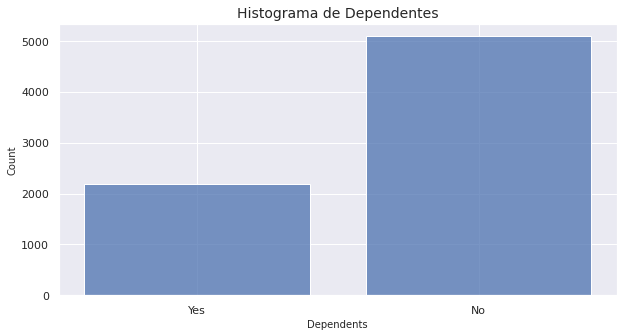

In [295]:
ax = sns.histplot(df["Dependents"] , shrink=.8,  bins = 2)
ax.axes.set_title('Histograma de Dependentes', fontsize = 14)
plt.show()

OBS: Indica se o cliente possui ou não dependentes. Dtype:Object. Dados indicam que a maioria dos clientes não possuem dependentes.

#### tenure

In [296]:
df["tenure"].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

In [297]:
df["tenure"].dtype

dtype('int64')

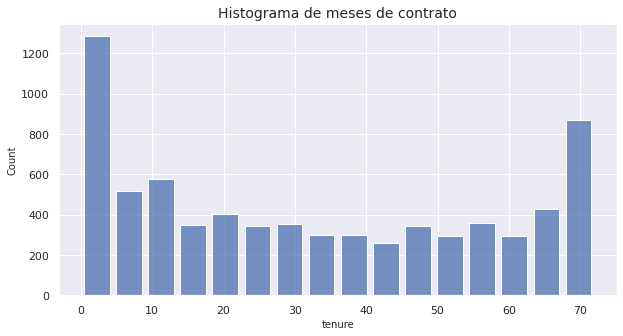

In [298]:
ax = sns.histplot(df["tenure"] , shrink=.8)
ax.axes.set_title('Histograma de meses de contrato', fontsize = 14)
plt.show()

In [ ]:
ax = sns.boxplot(x=df["tenure"] ,width = 0.3)
ax.axes.set_title('BoxPlot - Meses de Contrato, fontsize = 14)
plt.show()

OBS: Indica os meses de contrato do cliente.Dtype:Int

####PhoneService

In [299]:
df["PhoneService"].unique()

array(['Yes', 'No'], dtype=object)

In [300]:
df["PhoneService"].value_counts()

Yes    6560
No      707
Name: PhoneService, dtype: int64

In [301]:
Perc_telefone_nao = (len(df.loc[(df["PhoneService"] == "No")]) / len(df))*100
Perc_telefone_sim = (len(df.loc[(df["PhoneService"] == "Yes")]) / len(df))*100
print ("[SERVIÇO TELEFONICO] Percentual de clientes que possuem serviço telefone = {:.2f}%".format(Perc_telefone_sim))
print ("[SERVIÇO TELEFOnICO] Percentual de clientes que não possuem seriço telefone = {:.2f}%".format(Perc_telefone_nao))

[SERVIÇO TELEFONICO] Percentual de clientes que possuem serviço telefone = 90.27%
[SERVIÇO TELEFOnICO] Percentual de clientes que não possuem seriço telefone = 9.73%


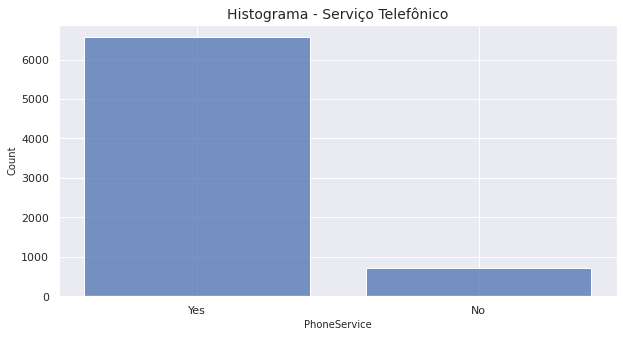

In [302]:
ax = sns.histplot(df["PhoneService"] , shrink=.8)
ax.axes.set_title('Histograma - Serviço Telefônico', fontsize = 14)
plt.show()

OBS:Indica se o cliente tem assinatura de serviço telefônico. Dtype: Object. Dados indicam que a maioria dos clientes possui serviço de telefone.

####MultipleLines

In [303]:
df["MultipleLines"].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [304]:
df["MultipleLines"].value_counts()

No                  3495
Yes                 3065
No phone service     707
Name: MultipleLines, dtype: int64

In [305]:
Perc_multilinhas_nao = (len(df.loc[(df["MultipleLines"] == "No")]) / len(df.loc[(df["PhoneService"] == "Yes")]))*100
Perc_multilinhas_sim = (len(df.loc[(df["MultipleLines"] == "Yes")]) / len(df.loc[(df["PhoneService"] == "Yes")]))*100
print("No grupo que possui SERVIÇO TELEFONICO")
print ("[MULTIPLAS LINHAS] Percentual possuem multiplas linhas = {:.2f}%".format(Perc_multilinhas_sim))
print ("[MULTIPLAS LINHAS] Percentual não possuem multiplas linhas = {:.2f}%".format(Perc_multilinhas_nao))

No grupo que possui SERVIÇO TELEFONICO
[MULTIPLAS LINHAS] Percentual possuem multiplas linhas = 46.72%
[MULTIPLAS LINHAS] Percentual não possuem multiplas linhas = 53.28%


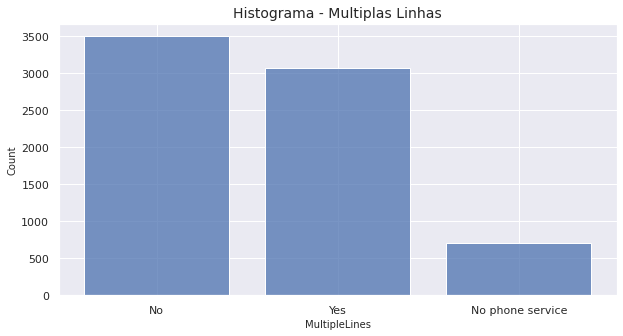

In [306]:
ax = sns.histplot(df["MultipleLines"] , shrink=.8)
ax.axes.set_title('Histograma - Multiplas Linhas', fontsize = 14)
plt.show()

OBS: Indica se o cliente tem assinatura de mais de uma linha de telefone. Dtype: Object. Distribuição de dados indica que dentre os possuem serviço telefônico, os numero dos que  não possuem multiplas linhas é um pouco maior do que os que possuem.

#### InternetService

In [307]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [308]:
df["InternetService"].value_counts()

Fiber optic    3198
DSL            2488
No             1581
Name: InternetService, dtype: int64

In [309]:
Perc_internet_nao = (len(df[(df["InternetService"] == "No")]) / len(df))*100
Perc_internet_sim = (len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ]) / len(df))*100
print ("[SERVICO INTERNET (DSL/FIBRA)] Percentual possuem internet = {:.2f}%".format(Perc_internet_sim))
print ("[SERVICO INTERNET (DSL/FIBRA)] Percentual não possuem internet = {:.2f}%".format(Perc_internet_nao))

[SERVICO INTERNET (DSL/FIBRA)] Percentual possuem internet = 78.24%
[SERVICO INTERNET (DSL/FIBRA)] Percentual não possuem internet = 21.76%


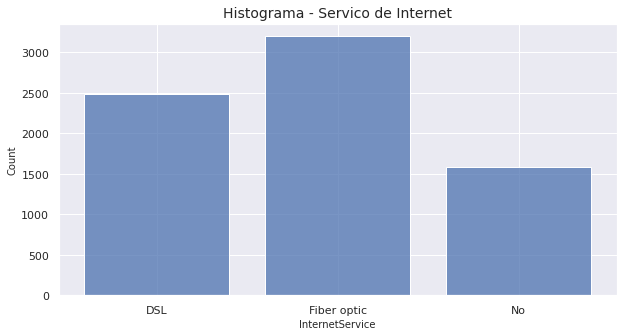

In [310]:
ax = sns.histplot(df["InternetService"] , shrink=.8)
ax.axes.set_title('Histograma - Servico de Internet', fontsize = 14)
plt.show()

OBS:Indica se o cliente possui assinatura de um provedor internet.Dtype: Object. Numero de clientes com serviço de internet(DSL ou Fibra) é maior do que os que não possuem.

####OnlneSecurity

In [311]:
df["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [312]:
df["OnlineSecurity"].value_counts()

No                     3608
Yes                    2078
No internet service    1581
Name: OnlineSecurity, dtype: int64

In [313]:
Perc_onlinesecurity_nao = (len(df[(df["OnlineSecurity"] == "No")]) / (len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ))*100
Perc_onlinesecurity_sim = (len(df[(df["OnlineSecurity"] == "Yes")])/(len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ) )*100
print("No grupo que possui SERVIÇO INTERNET")
print ("[SEGURANÇA ONLINE] Percentual possuem segurança online = {:.2f}%".format(Perc_onlinesecurity_sim))
print ("[SEGURANÇA ONLINE] Percentual não possuem segurança online = {:.2f}%".format(Perc_onlinesecurity_nao))

No grupo que possui SERVIÇO INTERNET
[SEGURANÇA ONLINE] Percentual possuem segurança online = 36.55%
[SEGURANÇA ONLINE] Percentual não possuem segurança online = 63.45%


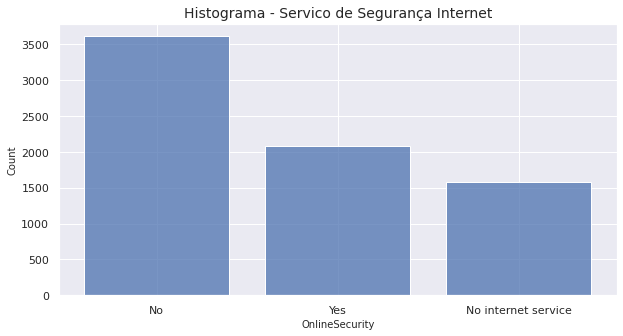

In [314]:
ax = sns.histplot(df["OnlineSecurity"] , shrink=.8)
ax.axes.set_title('Histograma - Servico de Segurança Internet', fontsize = 14)
plt.show()

OBS:Indica se o cliente possui assinatura adicional de segurança online. Dtype: Object. Dados indicam que entre os que possuem serviço de internet, o  numero de quem não possui segurança é maior do que os que possuem.

####OnlineBackup

In [315]:
df["OnlineBackup"].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [316]:
df["OnlineBackup"].value_counts()

No                     3182
Yes                    2504
No internet service    1581
Name: OnlineBackup, dtype: int64

In [317]:
Perc_onlinebackup_nao = (len(df[(df["OnlineBackup"] == "No")]) / (len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ))*100
Perc_onlinebackup_sim = (len(df[(df["OnlineBackup"] == "Yes")])/(len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ) )*100
print("No grupo que possui SERVIÇO INTERNET")
print ("[BACKUP ONLINE] Percentual possuem backup online = {:.2f}%".format(Perc_onlinebackup_sim))
print ("[BACKUP ONLINE] Percentual não possuem backup online = {:.2f}%".format(Perc_onlinebackup_nao))

No grupo que possui SERVIÇO INTERNET
[BACKUP ONLINE] Percentual possuem backup online = 44.04%
[BACKUP ONLINE] Percentual não possuem backup online = 55.96%


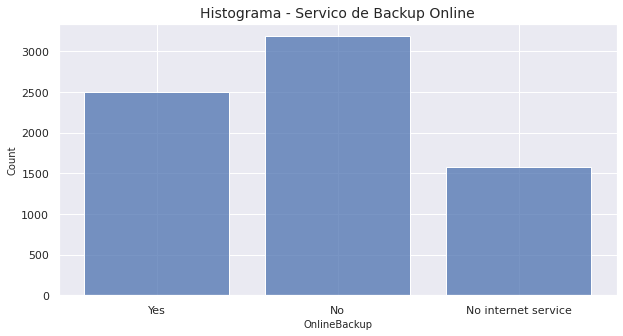

In [318]:
ax = sns.histplot(df["OnlineBackup"] , shrink=.8)
ax.axes.set_title('Histograma - Servico de Backup Online', fontsize = 14)
plt.show()

OBS:Indica assinatura adicional de backup online.Dtype: Object. Dados mostram que entre os cliente que possuem serviço de internet é maior o numero dos que não possuem backup online.

####DeviceProtection

In [319]:
df["DeviceProtection"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [320]:
df["DeviceProtection"].value_counts()

No                     3195
Yes                    2491
No internet service    1581
Name: DeviceProtection, dtype: int64

In [321]:
Perc_deviceprote_nao = (len(df[(df["DeviceProtection"] == "No")]) / (len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ))*100
Perc_deviceprote_sim = (len(df[(df["DeviceProtection"] == "Yes")])/(len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ) )*100
print("No grupo que possui SERVIÇO INTERNET")
print ("[PROTEÇÃO APARELHO] Percentual possuem proteção de aparelho= {:.2f}%".format(Perc_deviceprote_sim))
print ("[PROTEÇÃO DE APARELHO] Percentual não possuem proteção de aparelho = {:.2f}%".format(Perc_deviceprote_nao))

No grupo que possui SERVIÇO INTERNET
[PROTEÇÃO APARELHO] Percentual possuem proteção de aparelho= 43.81%
[PROTEÇÃO DE APARELHO] Percentual não possuem proteção de aparelho = 56.19%


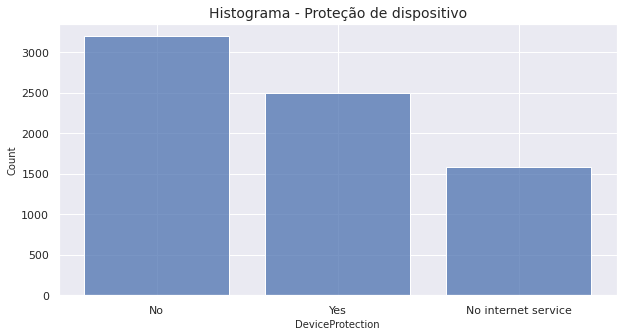

In [322]:
ax = sns.histplot(df["DeviceProtection"] , shrink=.8)
ax.axes.set_title('Histograma - Proteção de dispositivo', fontsize = 14)
plt.show()

OBS:#Indica se o cliente possui  assinatura adicional de proteção no dispositivo. Dtype:Object. Numero dos cleintes que não possuem serviço um pouco maior do que os que possuem.

####TechSupport

In [323]:
df["TechSupport"].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [324]:
df["TechSupport"].value_counts()

No                     3582
Yes                    2104
No internet service    1581
Name: TechSupport, dtype: int64

In [325]:
Perc_suportetec_nao = (len(df[(df["TechSupport"] == "No")]) / (len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ))*100
Perc_suportetec_sim = (len(df[(df["TechSupport"] == "Yes")])/(len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ) )*100
print("No grupo que possui SERVIÇO INTERNET")
print ("[SUPORTE TÉCNICO] Percentual possuem proteção de aparelho= {:.2f}%".format(Perc_suportetec_sim))
print ("[SUPORTE TÉCNICO] Percentual não possuem proteção de aparelho = {:.2f}%".format(Perc_suportetec_nao))

No grupo que possui SERVIÇO INTERNET
[SUPORTE TÉCNICO] Percentual possuem proteção de aparelho= 37.00%
[SUPORTE TÉCNICO] Percentual não possuem proteção de aparelho = 63.00%


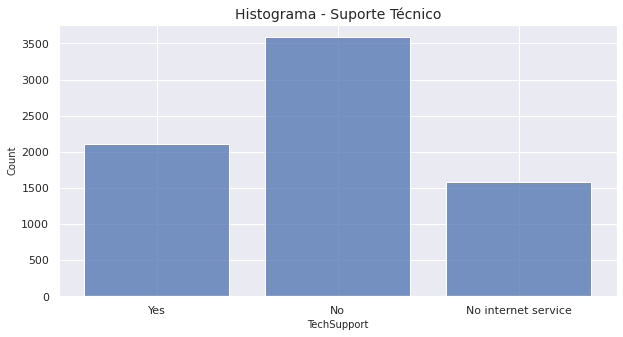

In [326]:
ax = sns.histplot(df["TechSupport"] , shrink=.8)
ax.axes.set_title('Histograma - Suporte Técnico', fontsize = 14)
plt.show()

OBS: Indica se ocliente possui assinatura adicional de suporte técnico, menos tempo de espera.Dtype:Object.
Numero de clientes que não possuem o serviço, maior do que os que possuem.

####StreamingTV

In [327]:
df["StreamingTV"].unique() 

array(['Yes', 'No', 'No internet service'], dtype=object)

In [328]:
df["StreamingTV"].value_counts()

No                     2896
Yes                    2790
No internet service    1581
Name: StreamingTV, dtype: int64

In [329]:
Perc_streamingTV_nao = (len(df[(df["StreamingTV"] == "No")]) / (len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ))*100
Perc_streamingTV_sim = (len(df[(df["StreamingTV"] == "Yes")])/(len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ) )*100
print("No grupo que possui SERVIÇO INTERNET")
print ("[STREAMING TV] Percentual possuem proteção de aparelho= {:.2f}%".format(Perc_streamingTV_sim))
print ("[STREAMING TV] Percentual não possuem proteção de aparelho = {:.2f}%".format(Perc_streamingTV_nao))

No grupo que possui SERVIÇO INTERNET
[STREAMING TV] Percentual possuem proteção de aparelho= 49.07%
[STREAMING TV] Percentual não possuem proteção de aparelho = 50.93%


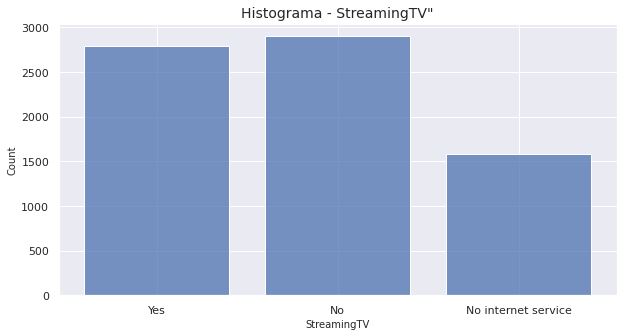

In [330]:
ax = sns.histplot(df["StreamingTV"] , shrink=.8)
ax.axes.set_title('Histograma - StreamingTV"', fontsize = 14)
plt.show()

OBS: Indica  assinatura de TV a cabo. Dtype: Object. Dados igualmente distribuidos entre os clientes que possuem o serviço de internet.

####StreamingMovies

In [331]:
df["StreamingMovies"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [332]:
df["StreamingMovies"].value_counts()

No                     2870
Yes                    2816
No internet service    1581
Name: StreamingMovies, dtype: int64

In [333]:
Perc_streamingmovies_nao = (len(df[(df["StreamingMovies"] == "No")]) / (len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ))*100
Perc_streamingmovies_sim = (len(df[(df["StreamingMovies"] == "Yes")])/(len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ) )*100
print("No grupo que possui SERVIÇO INTERNET")
print ("[STREAMING MOVIES] Percentual possuem proteção de aparelho= {:.2f}%".format(Perc_streamingmovies_sim))
print ("[STREAMING MOVIES] Percentual não possuem proteção de aparelho = {:.2f}%".format(Perc_streamingmovies_nao))

No grupo que possui SERVIÇO INTERNET
[STREAMING MOVIES] Percentual possuem proteção de aparelho= 49.53%
[STREAMING MOVIES] Percentual não possuem proteção de aparelho = 50.47%


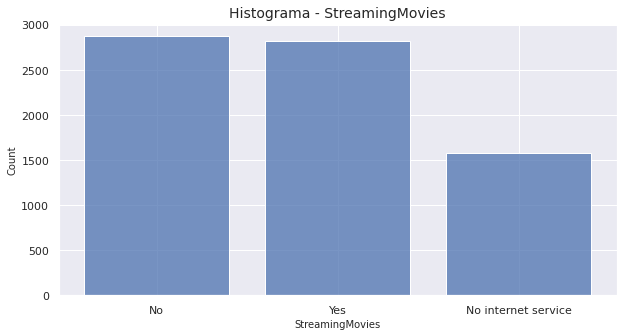

In [334]:
ax = sns.histplot(df["StreamingMovies"] , shrink=.8)
ax.axes.set_title('Histograma - StreamingMovies', fontsize = 14)
plt.show()

OBS: Indica assinatura de streaming de filmes. Dtype: Object. Dados igualmente distribuidos entre os que assinam o serviço de internet.

####Contract

In [335]:
df["Contract"].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [336]:
df["Contract"].value_counts()

Month-to-month    4005
Two year          1743
One year          1519
Name: Contract, dtype: int64

In [337]:
Perc_contrato_1ano = (len(df[(df["Contract"] == "One year")]) / (len(df)))*100
Perc_contrato_mes = (len(df[(df["Contract"] == "Month-to-month")]) / (len(df)))*100
Perc_contrato_2ano = (len(df[(df["Contract"] == "Two year")]) / (len(df)))*100
print ("[CONTRATO] Percentual com contrato de 1 ano {:.2f}%".format(Perc_contrato_1ano ))
print ("[CONTRATO] Percentual com contrato de 2 anos= {:.2f}%".format(Perc_contrato_2ano ))
print ("[CONTRATO] Percentual com contrato mensal = {:.2f}%".format(Perc_contrato_mes))

[CONTRATO] Percentual com contrato de 1 ano 20.90%
[CONTRATO] Percentual com contrato de 2 anos= 23.99%
[CONTRATO] Percentual com contrato mensal = 55.11%


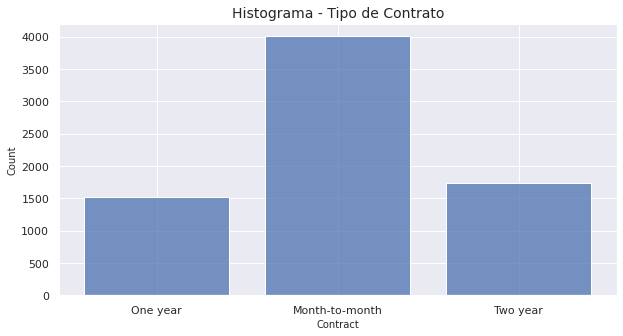

In [338]:
ax = sns.histplot(df["Contract"] , shrink=.8)
ax.axes.set_title('Histograma - Tipo de Contrato', fontsize = 14)
plt.show()

OBS:Indica tipo de contrato. Dtype: Object. Três tipo de contrato, sendo que a maioria dos clientes tem o plano mensal.

####PaperlessBilling

In [339]:
df["PaperlessBilling"].unique()

array(['Yes', 'No'], dtype=object)

In [340]:
df["PaperlessBilling"].value_counts()

Yes    4311
No     2956
Name: PaperlessBilling, dtype: int64

In [341]:
Perc_contadigital_sim = (len(df[(df["PaperlessBilling"] == "Yes")]) / (len(df)))*100
Perc_contadigital_nao = (len(df[(df["PaperlessBilling"] == "No")]) / (len(df)))*100
print ("[CONTA DIGITAL] Percentual com conta digital {:.2f}%".format(Perc_contadigital_sim ))
print ("[CONTA DIGITAL] Percentual sem conta digital= {:.2f}%".format(Perc_contadigital_nao ))

[CONTA DIGITAL] Percentual com conta digital 59.32%
[CONTA DIGITAL] Percentual sem conta digital= 40.68%


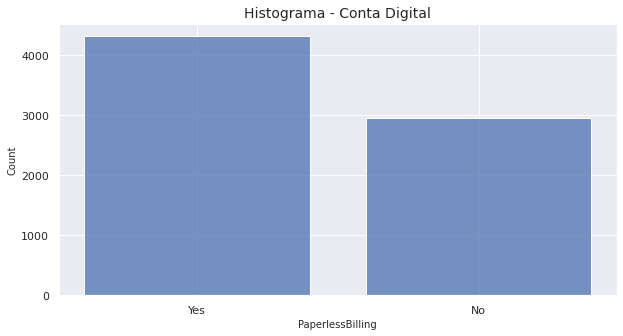

In [342]:
ax = sns.histplot(df["PaperlessBilling"] , shrink=.8)
ax.axes.set_title('Histograma - Conta Digital', fontsize = 14)
plt.show()

OBS: Indica se o cliente prefere receber online a fatura. Dtype: Object. Maioria dos clientes usam conta digital.

####PaymentMethod

In [343]:
df["PaymentMethod"].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [344]:
df["PaymentMethod"].value_counts()

Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: PaymentMethod, dtype: int64

In [345]:
Perc_eletroniccheck = (len(df[(df["PaymentMethod"] == "Electronic check")]) / (len(df)))*100
Perc_mailedcheck = (len(df[(df["PaymentMethod"] == "Mailed check")]) / (len(df)))*100
Perc_banktransfer = (len(df[(df["PaymentMethod"] == "Bank transfer (automatic)")]) / (len(df)))*100
Perc_creditcard = (len(df[(df["PaymentMethod"] == "Credit card (automatic)")]) / (len(df)))*100
print ("[METODO DE PAGAMENTO] Percentual com pagamento Cheque eletronico {:.2f}%".format(Perc_eletroniccheck ))
print ("[METODO DE PAGAMENTO] Percentual com pagamento Cheque postal= {:.2f}%".format(Perc_mailedcheck ))
print ("[METODO DE PAGAMENTO] Percentual com pagamento Ttransferencia bancária {:.2f}%".format(Perc_banktransfer ))
print ("[METODO DE PAGAMENTO] Percentual com pagamento Cartão de Crédito= {:.2f}%".format(Perc_creditcard ))

[METODO DE PAGAMENTO] Percentual com pagamento Cheque eletronico 33.65%
[METODO DE PAGAMENTO] Percentual com pagamento Cheque postal= 22.91%
[METODO DE PAGAMENTO] Percentual com pagamento Ttransferencia bancária 21.87%
[METODO DE PAGAMENTO] Percentual com pagamento Cartão de Crédito= 21.58%


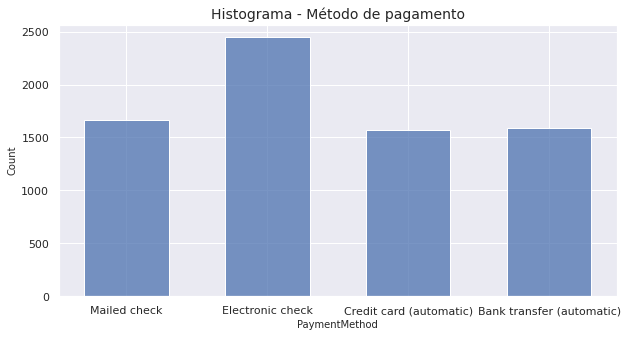

In [346]:
ax = sns.histplot(df["PaymentMethod"] , shrink=.6)
ax.axes.set_title('Histograma - Método de pagamento', fontsize = 14)

plt.show()

OBS: Indica forma de pagamento. Dtype:Object. Podendo apresentar os valores: Electronic check, Mailed check,Brank transfer(automatic), Credt card(automatic)

####Charges.Monthly

In [347]:
df["Charges.Monthly"].unique()

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

In [348]:
df["Charges.Monthly"].value_counts()

20.05     65
19.85     46
19.90     46
19.70     45
19.55     45
          ..
23.45      1
116.55     1
106.85     1
68.55      1
67.85      1
Name: Charges.Monthly, Length: 1585, dtype: int64

In [349]:
df["Charges.Monthly"].dtype

dtype('float64')

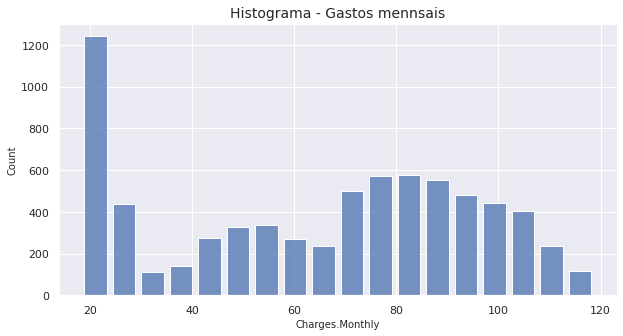

In [350]:
ax = sns.histplot(df["Charges.Monthly"] , shrink=.8)
ax.axes.set_title('Histograma - Gastos mennsais', fontsize = 14)
plt.show()

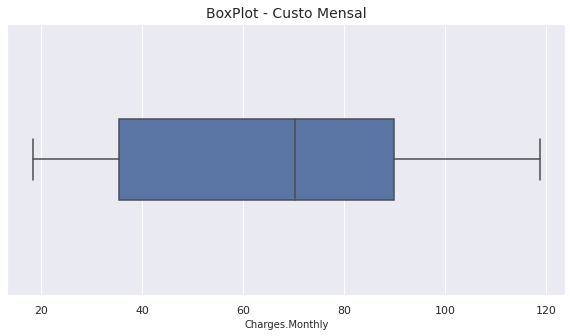

In [351]:
ax = sns.boxplot(x=df["Charges.Monthly"] ,width = 0.3)
ax.axes.set_title('BoxPlot - Custo Mensal', fontsize = 14)
plt.show()

OBS: Indica total de todos os serviços do cliente por mês. Dtype: Float. 

####Charges.Total

In [352]:
df["Charges.Total"].unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

OBS: Indica o total gasto pelo cliente. Esta coluna deveria ser float e não objeto

### <i>Corrigindo inconsistências </i>

[CHURN] - Apresenta em torno de 3% de dados sem valor definido. 
O objetivo deste projeto é identificar/relacionar o churn, se um registro não contem esta informação, o dado não é util
Considerando o baixo valor percentual, os dados estão sendo removidos do dataframe

In [353]:
df.drop( df[(df["Churn"] == "")].index, inplace = True, axis = 0)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [354]:
df.shape

(7043, 21)

[Charges.Total]: O valor desta coluna deveria ser float e não object, por se tratar de valor monetário.

In [355]:
df["Charges.Total"] = round(pd.to_numeric(df["Charges.Total"], errors='coerce'),2)

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


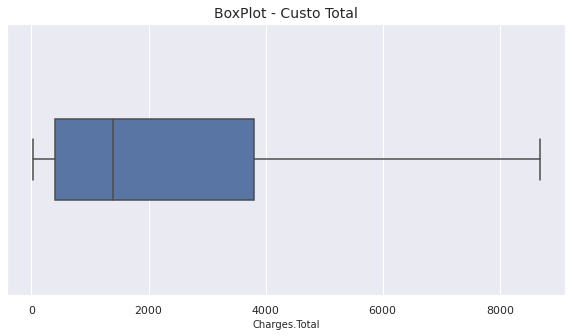

In [357]:
ax = sns.boxplot(x=df["Charges.Total"] ,width = 0.3)
ax.axes.set_title('BoxPlot - Custo Total', fontsize = 14)
plt.show()


Após a conversão "Charges.Total" para float, apareceram 11 valores nulos, provenientes de strings vazias " ".
Estes foram substituidos por zero. 
No entanto, considerando que estes clientes apresentam dado mensal, o valor total teria que ser no minino igual ao mes.
Talvez fosse  mais adequado apagar os 11 dados, parece haver algum tipo de inconsistência nos dados.


In [358]:
df["Charges.Total"].isnull().sum()

11

In [359]:
df["Charges.Total"].fillna(0, inplace = True)

In [360]:
df.loc[(df["Charges.Total"] == 0 )]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0


Algumas colunas apresentam os valores:"Yes"/"No"/"No service".

O valor "No service" destas colunas pode ser substituido para "No" sem comprometimento de informação.

Foram tambem alterados os valores Yes/ No, para valores numéricos (1/0)

In [361]:
dados_yes_no = ["Churn","Partner", "Dependents","PhoneService","PaperlessBilling", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

In [362]:
for column in dados_yes_no:
  df[column] = df[column].replace({"No internet service":0, "No phone service": 0, "No": 0, "Yes":1})

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   int64  
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-null   int64  
 16  Contract          7043 non-null   object 


### <i> Adicionando nova coluna - contas diárias </i>

Criar uma  nova coluna contendo os gastos diários do(cliente) e iinsira na posição 18 do DataFrame

In [364]:
df.insert(loc = 18, column = 'gasto_diario',  value = round(df["Charges.Monthly"]/30,2) )

In [365]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,gasto_diario,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,2.19,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,2.00,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,2.46,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,3.27,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,2.80,Mailed check,83.9,267.40


### <i>Alguns tratamentos nos dados </i>

Alterando os dados de gênero para: 0 - Masculino e 1 Feminino

In [366]:
df.insert(loc = 2 , column = 'genero' ,  value = df["gender"].map(dic_Sexo))
df= df.drop("gender",axis=1)

### <i> Traduzindo para português </i>

In [367]:
df.rename(columns={
                  'customerID':  "ID_cliente" ,
                  'SeniorCitizen': "senioridade", 
                  'Partner' : "parceiro",
                  'Dependents': "dependentes",
                  'PhoneService' :"servico_telefonico",
                  'tenure': 'meses_contrato',
                  'MultipleLines': 'multiplas_linhas',
                  'InternetService': 'servico_internet',
                  'OnlineBackup':'backup_online',
                  'OnlineSecurity': 'seguranca_online',
                  'DeviceProtection': 'protecao_aparelho',
                  'TechSupport': 'suporte_tecnico',
                  'StreamingTV': 'streamning_TV',
                  'StreamingMovies': 'streaming_filmes',
                  'PaperlessBilling': "conta_digital",
                  'Contract': 'contrato',
                  'PaymentMethod':'metodo_pagamento',
                  'Charges.Monthly':'gasto_mensal',
                  'Charges.Total':'gasto_total',
                  },
          inplace=True) 

In [368]:
df.head()

,ID_cliente,Churn,genero,senioridade,parceiro,dependentes,meses_contrato,servico_telefonico,multiplas_linhas,servico_internet,...,protecao_aparelho,suporte_tecnico,streamning_TV,streaming_filmes,contrato,conta_digital,gasto_diario,metodo_pagamento,gasto_mensal,gasto_total
0,0002-ORFBO,0,1,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,2.19,Mailed check,65.6,593.30
1,0003-MKNFE,0,0,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,2.00,Mailed check,59.9,542.40
2,0004-TLHLJ,1,0,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,2.46,Electronic check,73.9,280.85
3,0011-IGKFF,1,0,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,3.27,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,1,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,2.80,Mailed check,83.9,267.40


Alterando os valores da coluna PaymentMethod para portugues

In [369]:
df["metodo_pagamento"] = df["metodo_pagamento"].replace({"Electronic check": "cheque_eletronico" ,"Mailed check": "cheque_postal" ,"Bank transfer (automatic)": "transferencia_bancária","Credit card (automatic)": "cartao_credito"})

Alterando os valores da coluna Contract para portugues:

In [370]:
df["contrato"] = df["contrato"].replace({'One year': "1_ano", 'Month-to-month': "mensal", 'Two year':"2_anos"})

In [371]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_cliente          7043 non-null   object 
 1   Churn               7043 non-null   int64  
 2   genero              7043 non-null   int64  
 3   senioridade         7043 non-null   int64  
 4   parceiro            7043 non-null   int64  
 5   dependentes         7043 non-null   int64  
 6   meses_contrato      7043 non-null   int64  
 7   servico_telefonico  7043 non-null   int64  
 8   multiplas_linhas    7043 non-null   int64  
 9   servico_internet    7043 non-null   object 
 10  seguranca_online    7043 non-null   int64  
 11  backup_online       7043 non-null   int64  
 12  protecao_aparelho   7043 non-null   int64  
 13  suporte_tecnico     7043 non-null   int64  
 14  streamning_TV       7043 non-null   int64  
 15  streaming_filmes    7043 non-null   int64  
 16  contra

### <i> Salvando DataFrame -arquivo CSV</i>

In [372]:
df.to_csv("Telco-Customer-Churn.csv", index=False)

## <b>CARDS - SEMANA 1</b>

- Estruturação e Analise do Dataframe a partir de dados JSON

- Identificação e tratamento de inconsistências:

  01 - Churn com valores Yes, No e valores vazios. Os valores vazios representavam em torno de 3% do dataset e foram removidos.

  02 - Charges.Total: total gasto pelo cliente: o valor desta coluna foi alterado de para float, por ser um valor monetário. Após esta alteração, apareceram 11 valores vazios nesta coluna, que foram substituidos por 0, até maiores esclarecimentos.

  03 - Substituição dos valores "No Phone/Internet Service" por "No". E na sequencia substituido valores No/Yes por 0/1

- Tradução de colunas realizada

- Adição uma nova coluna na posição 18,contendo o gasto diário.

- Os dados foram substituidos por numeros, exceto as seguintes colunas:

  01.ID_cliente

  02.servico_internet

  03.contrato

  04.metodo_pagamento

  Aguardando próxima semana do desafio para definição da melhor estratégia para o tratamento destes dados.

EXTRAS

Criação da tabela de correlação para futura análise dos fatores que influenciam o churn.

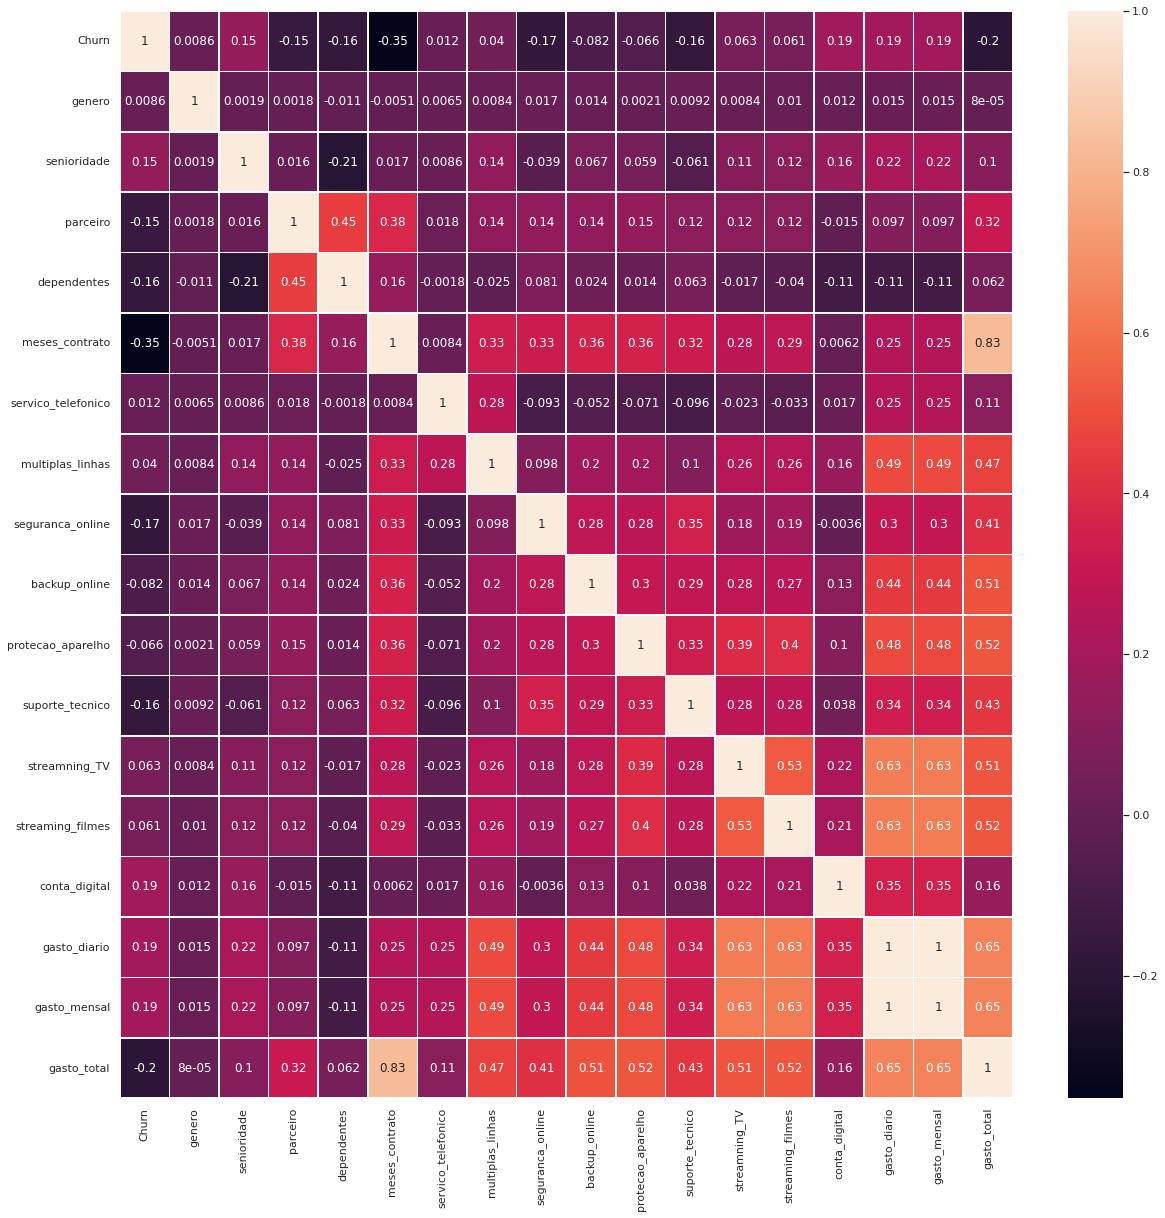

In [373]:
correlacao = df.corr()
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(correlacao, annot=True, linewidths=0.5)
plt.show()

## SEMANA 2